<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Arboles/blob/main/2_Arboles_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/XavierCarrera/Tutorial-Machine-Learning-Arboles/main/Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Análisis de Datos

In [14]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

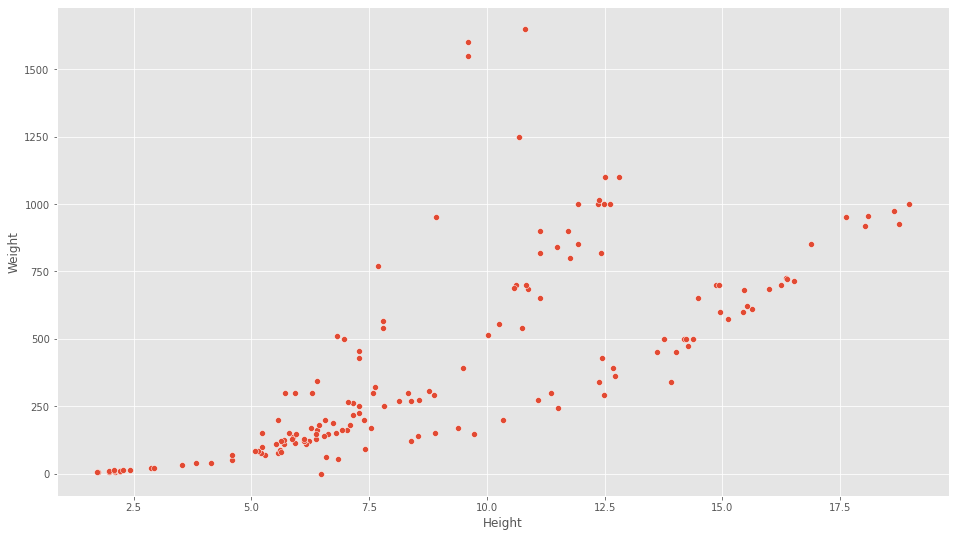

In [16]:
sns.scatterplot(data=df, x="Height", y="Weight")

# Entrenamiento de Modelo

In [4]:
X = df.drop(["Species"], axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [7]:
clf = tree.DecisionTreeClassifier().fit(X, y)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Visualización del Árbol

[Text(721.68, 471.76714285714286, 'X[4] <= 12.637\ngini = 0.786\nsamples = 159\nvalue = [35, 11, 56, 17, 20, 14, 6]'),
 Text(647.28, 436.82142857142856, 'X[4] <= 3.23\ngini = 0.747\nsamples = 127\nvalue = [4, 11, 55, 17, 20, 14, 6]'),
 Text(587.76, 401.87571428571425, 'X[0] <= 6.3\ngini = 0.124\nsamples = 15\nvalue = [0, 0, 1, 0, 0, 14, 0]'),
 Text(558.0, 366.93, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]'),
 Text(617.52, 366.93, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 0, 0, 14, 0]'),
 Text(706.8, 401.87571428571425, 'X[3] <= 47.3\ngini = 0.699\nsamples = 112\nvalue = [4, 11, 54, 17, 20, 0, 6]'),
 Text(677.04, 366.93, 'X[5] <= 5.679\ngini = 0.67\nsamples = 104\nvalue = [4, 11, 54, 9, 20, 0, 6]'),
 Text(550.56, 331.9842857142857, 'X[2] <= 32.0\ngini = 0.721\nsamples = 83\nvalue = [4, 11, 36, 9, 20, 0, 3]'),
 Text(520.8, 297.03857142857146, 'X[4] <= 8.352\ngini = 0.664\nsamples = 74\nvalue = [4, 11, 36, 0, 20, 0, 3]'),
 Text(386.88, 262.09285714285716, 'X[5] <= 4.136\ng

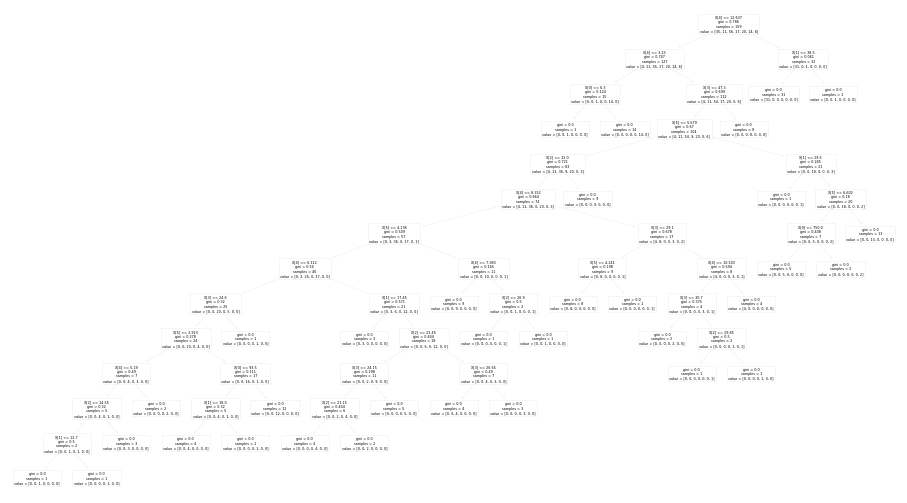

In [13]:
tree.plot_tree(clf) 